In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('student-mat.csv')
#data.info()

In [3]:
df = pd.get_dummies(data.drop('paid', axis=1))
#df.info()

In [4]:
X = df
y = data.paid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
#X_train

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

***1. Random Forest***

***1.1 Random Forest Hyperparameter Tuning***

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1, n_jobs=-1)
param_grid = {'n_estimators':np.arange(1,100)}
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv = rf_cv.fit(X_train, y_train)
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

RandomForestClassifier(n_estimators=82, n_jobs=-1, random_state=1)
0.6858757062146893


***1.2 Random Forest Model Fitting***

In [7]:
rf = RandomForestClassifier(n_estimators=82, n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

rf_ac = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_cv_score = cross_val_score(rf, X_test, y_test, scoring='roc_auc').mean()

print('Random Forest: Accuracy=%.3f' % (rf_ac))
print('Random Forest: f1-score=%.3f' % (rf_f1))
print('Random Forest: cv score=%.3f' % (rf_cv_score))

Random Forest: Accuracy=0.697
Random Forest: f1-score=0.696
Random Forest: cv score=0.661


Text(0.5, 1.0, 'Random Forest Classifier: Feature Importances')

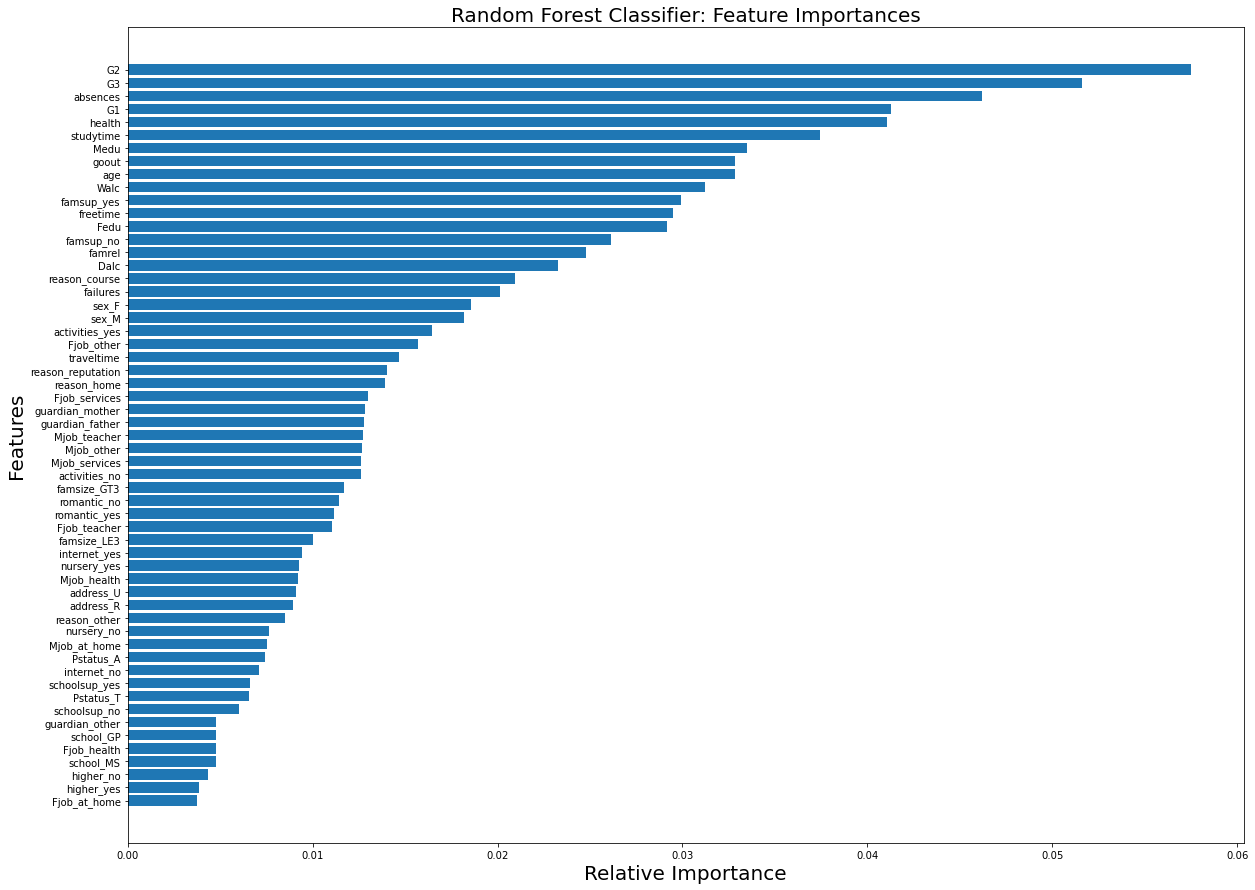

In [8]:
feature_rank = pd.DataFrame(list(zip(X, rf.feature_importances_)), columns=['feature', 'score'])
feature_rank = feature_rank.sort_values(by='score')

plt.figure(figsize=(20, 15))
plt.barh(feature_rank.feature, feature_rank.score)
plt.xlabel('Relative Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Random Forest Classifier: Feature Importances', fontsize=20)

***1.3 Random Forest ROC curve***

In [9]:
rf_y_score = rf.predict_proba(X_test)
rf_y_score = rf_y_score[:,1]
print('ROC-AUC Score:', roc_auc_score(y_test, rf_y_score))

ROC-AUC Score: 0.7406122448979592


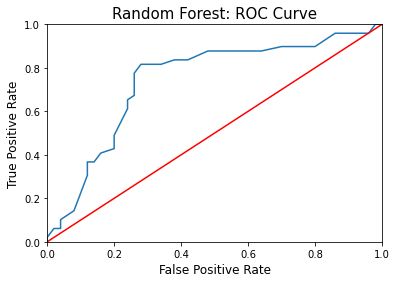

In [10]:
roc_y_test = y_test.replace({'yes': 1, 'no': 0})
false_positive_rate, true_positive_rate, thresholds = roc_curve(roc_y_test, rf_y_score)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest: ROC Curve',fontsize=15)
plt.axis([0, 1, 0, 1])
plt.show()

***2. K-Nearest Neighbor***

***2.1 K-Nearest Neighbor Hyperparameter Tuning***

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,100)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 52}
0.6689830508474576


***2.2 K-Nearest Neighbor Model Fitting***

In [25]:
knn = KNeighborsClassifier(n_neighbors=52)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

knn_ac = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_cv_score = cross_val_score(knn, X_test, y_test, scoring='roc_auc').mean()

print('KNN: Accuracy=%.3f' % (knn_ac))
print('KNN: f1-score=%.3f' % (knn_f1))
print('KNN: cv score=%.3f' % (knn_cv_score))

KNN: Accuracy=0.657
KNN: f1-score=0.657
KNN: cv score=0.571


***2.3 KNN ROC curve***

In [27]:
knn_y_score = knn.predict_proba(X_test)
knn_y_score = knn_y_score[:,1]
print('ROC-AUC Score:', roc_auc_score(y_test, knn_y_score))

ROC-AUC Score: 0.7122448979591838


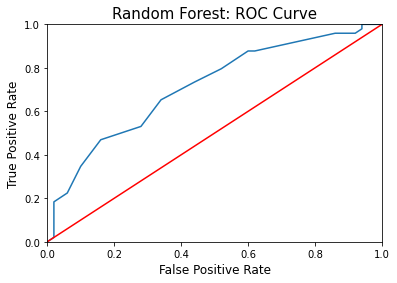

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(roc_y_test, knn_y_score)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest: ROC Curve',fontsize=15)
plt.axis([0, 1, 0, 1])
plt.show()

***3. Gradient Boosting***

***3.1 Gradient Boosting Hyperparameter Tuning***

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1)
param_grid = {'n_estimators':np.arange(1,100)}
gb_cv = GridSearchCV(gb, param_grid, cv=5)
gb_cv = gb_cv.fit(X_train, y_train)
print(gb_cv.best_estimator_)
print(gb_cv.best_score_)

GradientBoostingClassifier(n_estimators=96, random_state=1)
0.6586440677966101


***3.2 Gradient Boosting Model Fitting***

In [35]:
gb = GradientBoostingClassifier(n_estimators=96, random_state=1)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)

gb_ac = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred, average='weighted')
gb_cv_score = cross_val_score(gb, X_test, y_test, scoring='roc_auc').mean()

print('Gradient Boosting: Accuracy=%.3f' % (gb_ac))
print('Gradient Boosting: f1-score=%.3f' % (gb_f1))
print('Gradient Boosting: cv score=%.3f' % (gb_cv_score))

Gradient Boosting: Accuracy=0.657
Gradient Boosting: f1-score=0.653
Gradient Boosting: cv score=0.674


Text(0.5, 1.0, 'Gradient Boosting Classifier: Feature Importances')

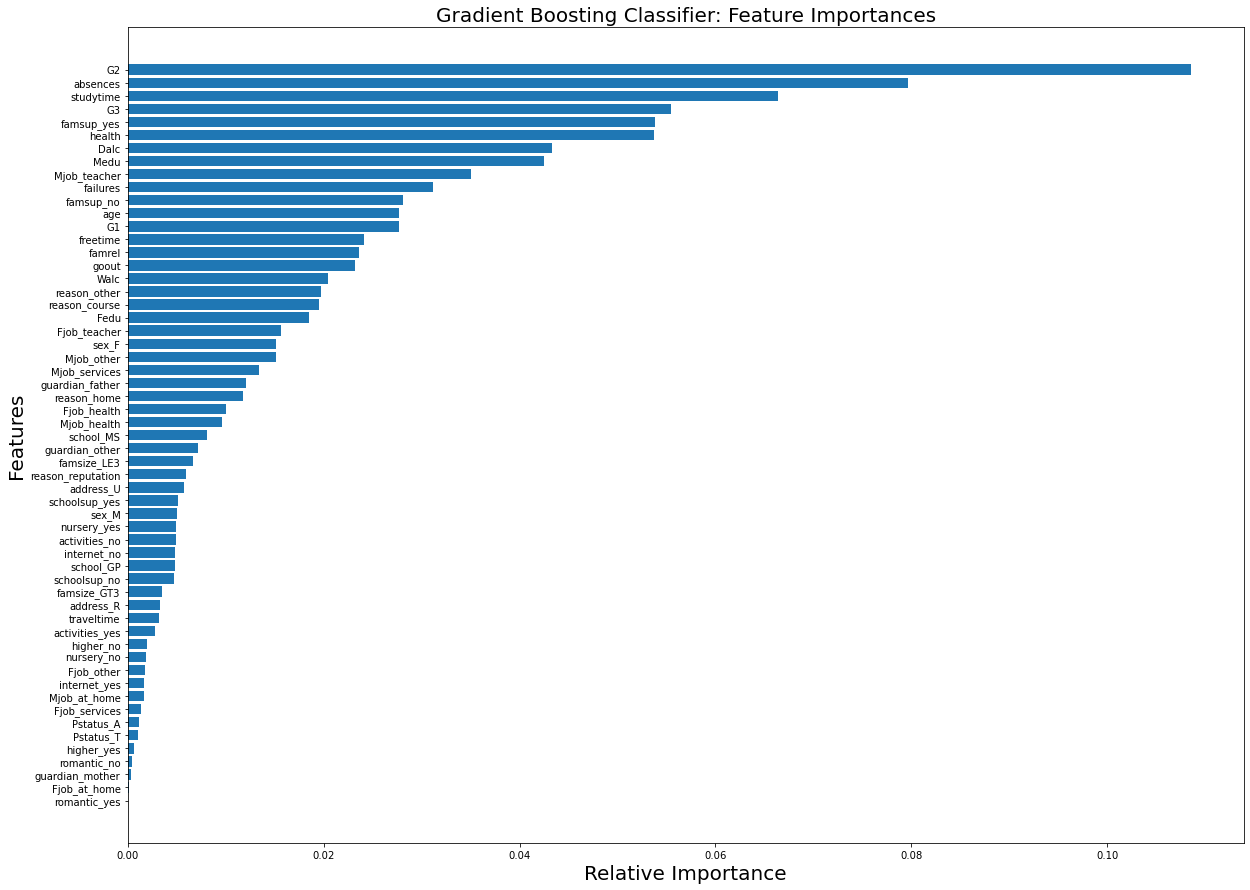

In [36]:
feature_rank = pd.DataFrame(list(zip(X, gb.feature_importances_)), columns=['feature', 'score'])
feature_rank = feature_rank.sort_values(by='score')

plt.figure(figsize=(20, 15))
plt.barh(feature_rank.feature, feature_rank.score)
plt.xlabel('Relative Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Gradient Boosting Classifier: Feature Importances', fontsize=20)

***3.3 Gradient Boosting ROC curve***

In [38]:
gb_y_score = gb.predict_proba(X_test)
gb_y_score = gb_y_score[:,1]
print('ROC-AUC Score:', roc_auc_score(y_test, gb_y_score))

ROC-AUC Score: 0.7187755102040817


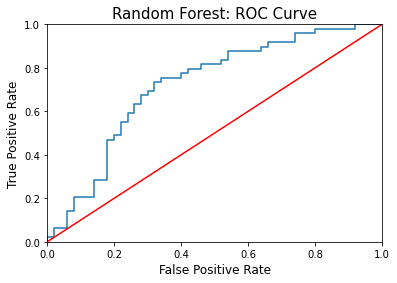

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(roc_y_test, gb_y_score)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'r')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest: ROC Curve',fontsize=15)
plt.axis([0, 1, 0, 1])
plt.show()